In [ ]:
# tshirt size prediction using KNN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv("tshirt.csv")

In [ ]:
data.head()

,height_cm,weight_kg,size
0,165,60,S
1,170,65,M
2,175,70,L
3,180,75,L
4,160,55,S


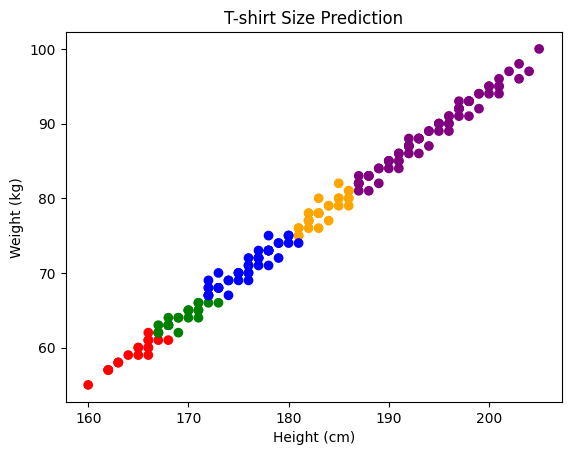

In [ ]:
color_map = {'S': 'red', 'M': 'green', 'L': 'blue', 'XL': 'orange', 'XXL': 'purple'}

# Map the sizes to colors using the colormap
colors = data['size'].map(color_map)

# Plot the scatter chart
plt.scatter(data["height_cm"], data["weight_kg"], c=colors)

# Add labels and title
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("T-shirt Size Prediction")

# Show the plot
plt.show()

In [ ]:
x = data.drop("size", axis=1)

In [ ]:
y = data["size"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [ ]:
# this algorithm is without scaling the data.
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_pred, y_test)

0.9230769230769231

In [ ]:
# Now lets scale the data, and then train the model.

scaler = StandardScaler()
x_trained_transformed = scaler.fit_transform(x_train)
x_test_transformed = scaler.transform(x_test)

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 3)
knn2.fit(x_trained_transformed, y_train)
y_pred2 = knn2.predict(x_test_transformed)

accuracy_score(y_pred2, y_test)

0.8717948717948718

In [ ]:
# predicting using KNN
score = []
for i in range(1, 21):
  knn3 = KNeighborsClassifier(n_neighbors = i)
  knn3.fit(x_trained_transformed, y_train)
  y_pred = knn3.predict(x_test_transformed)
  score.append(accuracy_score(y_pred, y_test))



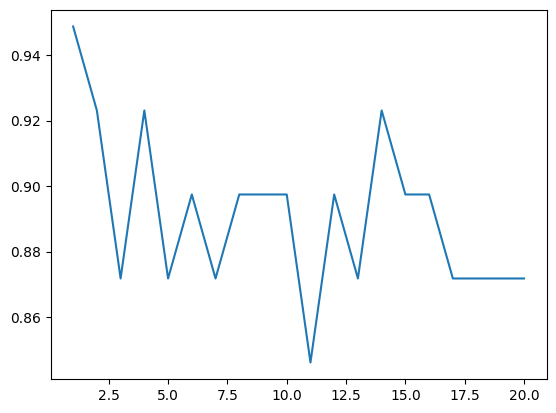

In [ ]:
plt.plot(range(1, 21), score)

In [ ]:
y_pred = knn.predict([[170, 120]])
print(y_pred[0])

XXL


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
